# Scatter Plot of The Relationship between Heart Rate and Power while Running

<a id='section_id2'></a>

I want to start things off by taking a look at some of the relationships within the dataset with a focus on running. Heart rate is one of the metrics that was aggregated in from the devices and it stands out as something I believe most people are intuitively aware of and understand. My assumptions have been that as you increase intensity of a workout, your heart rate will usually begin to change and probably increase. Although, this is not always the case all the time. For example, it may be true that when you start a training regimen, your heart rate will be high, but over time as you adapt to the program, get stronger, gain endurance, etc., you will start to see that your heart rate may decrease as you become accustomed to the workouts. 

So, we will take a look at how heart_rate varies with power while running, and we will do this for each day that the subject ran. A scatter plot made sense here because we can easily spot trends or patterns of where data tends to cluster or how spread out it is. A line of best fit was included in each individual plot as well which is a way to show how correlated power and heart_rate are. 

Here I import libraries and read in our csv files that I need for plotting

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df_run = pd.read_csv('./csv/df_run.csv')
df_fitted = pd.read_csv('./csv/df_fitted.csv')

In the following cell, I create an overall figure to which all my plots will be adhered to. There is a `for` loop that will loop through all the groups of our dataframe according to date, and will create subplots that will plot the specific days power and heart rate relationship with the line of best fit. This will be organized in a 5 x 2 matrix so to speak. Outside of the for loop we create another scatter plot of all the running days where we are able to see them by each different color representing a date. 

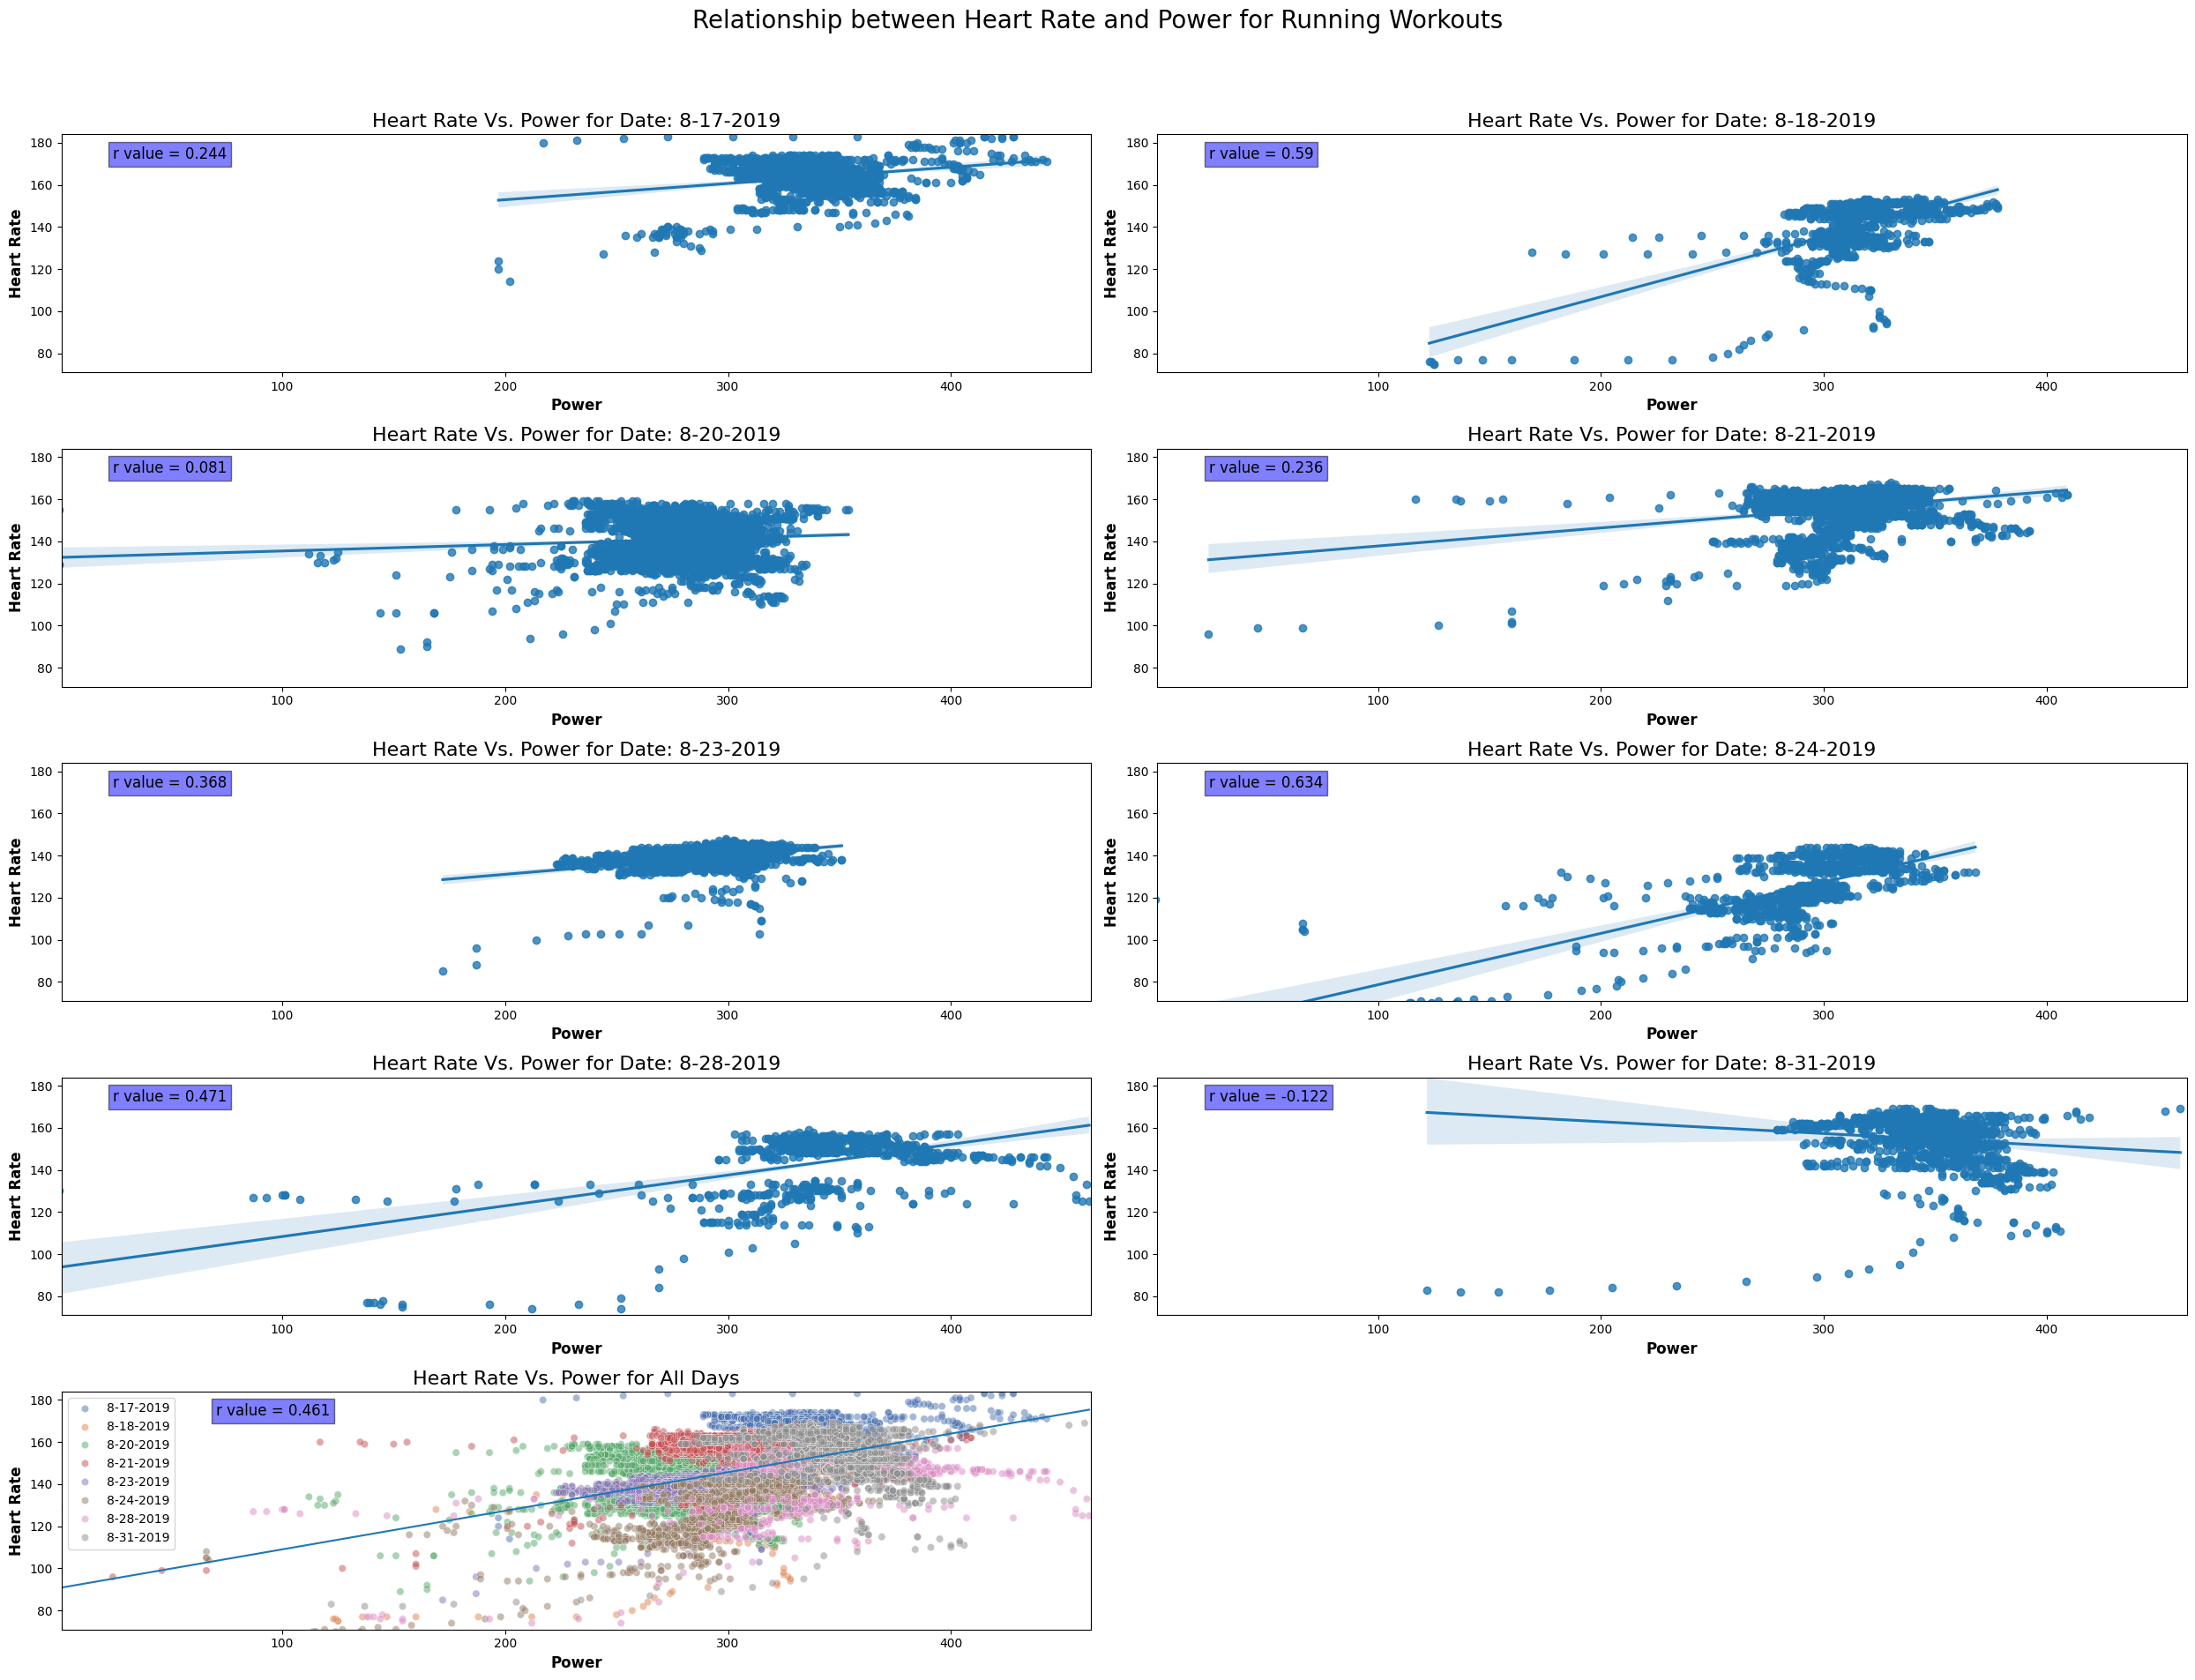

In [43]:
fig = plt.figure(figsize=(25,20))
text_box_props = dict(boxstyle='square', facecolor='blue', alpha=0.5)

global_min_x = df_run['Power'].min()
global_max_x = df_run['Power'].max()
global_min_y = df_run['heart_rate'].min()
global_max_y = df_run['heart_rate'].max()

count = 1
for group, data in df_run.groupby('date'):
    ax = fig.add_subplot(5, 2, count)
    ax.set_xlim(global_min_x+1, global_max_x+1)
    ax.set_ylim(global_min_y+1, global_max_y+1)
    sns.regplot(data=data, x='Power', y='heart_rate', ax=ax)
    ax.set_ylabel('Heart Rate', fontweight='bold', fontsize=12)
    ax.set_xlabel('Power', fontweight='bold', fontsize=12)
    ax.set_title('Heart Rate Vs. Power for Date: ' + str(group), fontsize=16)
    r,p = pearsonr(data['Power'], data['heart_rate'])
    ax.text(0.05, 0.95, 'r value = ' + str(round(r,3)), transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=text_box_props)
    count += 1

ax2 = fig.add_subplot(5, 2, count)
r_all,p_all = pearsonr(df_run['Power'], df_run['heart_rate'])

sns.scatterplot(data=df_run, x='Power', y='heart_rate', hue='date', palette='deep', alpha=0.5, ax=ax2)
ax2.set_ylabel('Heart Rate', fontweight='bold', fontsize=12)
ax2.set_xlabel('Power', fontweight='bold', fontsize=12)
ax2.set_xlim(global_min_x+1, global_max_x+1)
ax2.set_ylim(global_min_y+1, global_max_y+1)
ax2.text(0.15, 0.95, 'r value = ' + str(round(r_all,3)), transform=ax2.transAxes, fontsize=12,
        verticalalignment='top', bbox=text_box_props)
count += 1

sns.lineplot(data=df_fitted, x='x', y='y', ax=ax2)

fig.suptitle('Relationship between Heart Rate and Power for Running Workouts', fontsize=20)

plt.title('Heart Rate Vs. Power for All Days', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

I find the results a little surprising. I would have expected that the correlation would be pretty high, but on the best day, the r value was only `0.471`, with all the running days having an r value of `0.461`. This suggests that they are not really correlated, although we can see the correlation varying over this period. What this is telling me is that there might be some sort of adaptation happening and the subject is getting better or more acclimated to running. On the days of a very low correlation, it could have been a day where the subject felt really good, was rested, and recovered from previous sessions. As the subject exerted more power, the heart rate did not spike up to match with it as much. This could be something to keep track of going forward and to adjust rest and recovery periods. Other times where we say higher correlations between heart rate and power could have been because of feeling fatigued which cause the subject to exert more effort and therefore contribute to higher heart rates. 